In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm

In [2]:
#Abrir el archivo

df=pd.read_csv("../heights.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1050 non-null   object 
 1   height  1050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.5+ KB


In [4]:
#media promedio de estatura de las personas que han sido evaluadas
df["height"].mean()

np.float64(68.32301331818972)

In [5]:
df["height"]

0       75.000000
1       70.000000
2       68.000000
3       74.000000
4       61.000000
          ...    
1045    69.000000
1046    69.000000
1047    63.385827
1048    66.000000
1049    66.000000
Name: height, Length: 1050, dtype: float64

In [6]:
df["height"].sort_values(ascending=True)

1044    50.000000
1031    50.000000
193     51.000000
980     52.000000
981     52.000000
          ...    
376     79.050000
280     80.000000
252     80.000000
992     81.000000
1016    82.677165
Name: height, Length: 1050, dtype: float64

In [7]:
my_list = [7, 3, 4, 4, 5, 6, 3, 4]
my_list.sort()
my_list

[3, 3, 4, 4, 4, 5, 6, 7]

In [8]:
df["height"].median() #si corto a la mitad la lista ordenada de estatuars es el valor de el medio

np.float64(68.5)

In [9]:
#Rango es la diferencia del valor mayor y el valor menor de los datos numericos de analisis
df["height"].max()-df["height"].min()

np.float64(32.67716535433071)

In [10]:
#cuartiles
my_list = [7, 3, 4, 4, 5, 6, 3, 4]
my_list.sort()
my_list

[3, 3, 4, 4, 4, 5, 6, 7]

In [11]:
df["height"].quantile([0.25, 0.5, 0.75]) 

0.25    66.0
0.50    68.5
0.75    71.0
Name: height, dtype: float64

In [12]:
#cuanto en promedio se desvian los datos del centro: desviacion estandar

df["height"].std(ddof=1) #ddof es grados de libertad

np.float64(4.078616969642447)

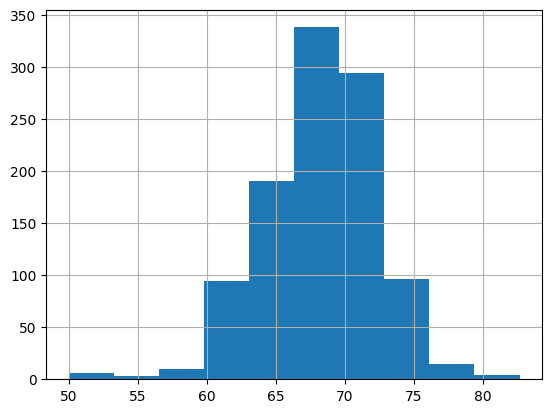

In [13]:
df["height"].hist()
plt.show()

In [14]:
#rang intercuartilico es la diferencia del cuartil 3 - el cuartil 1

df["height"].quantile(.75)-df["height"].quantile(.25)

np.float64(5.0)

In [15]:
df.sample(10)

,sex,height
393,Female,65.0
388,Male,78.0
719,Male,67.0
588,Male,66.9
214,Female,64.0
383,Male,66.0
673,Male,68.0
562,Male,66.0
32,Female,67.0
570,Male,69.0


In [16]:
df[df["sex"]=="Male"]["height"].mean()

np.float64(69.31475494143555)

In [17]:
df[df["sex"]=="Male"]["height"].describe()

count    812.000000
mean      69.314755
std        3.611024
min       50.000000
25%       67.000000
50%       69.000000
75%       72.000000
max       82.677165
Name: height, dtype: float64

<Axes: >

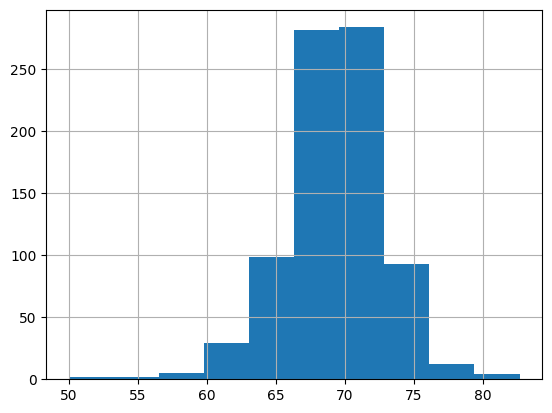

In [18]:
df[df["sex"]=="Male"]["height"].hist()

In [19]:
sns.boxplot(data=df["height"], hue=df["sex"])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<function matplotlib.pyplot.show(close=None, block=None)>

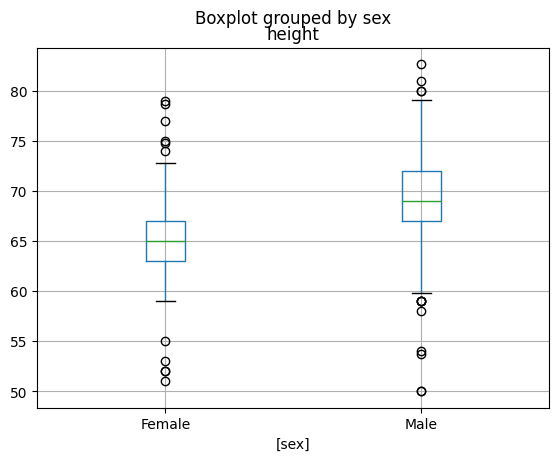

In [ ]:
df.boxplot(by="sex")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

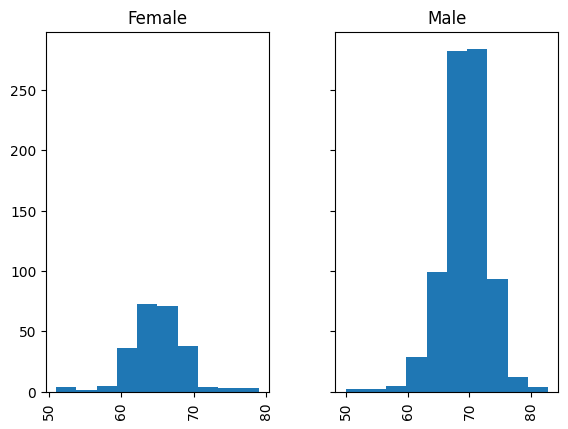

In [ ]:
df.hist(by="sex", sharey=True)
plt.show

La distribucion Bernoulli es la mas basica porque corresponde a la probabilidad de que un evento se de o no se de
Por ejemplo el lanzamiento de una moneda
El valor esperado de un evento Bernoulli con probabilidad de exito p y de no exito q (1-p)
La varianza es la desviacion estandar al cuadrado pxq

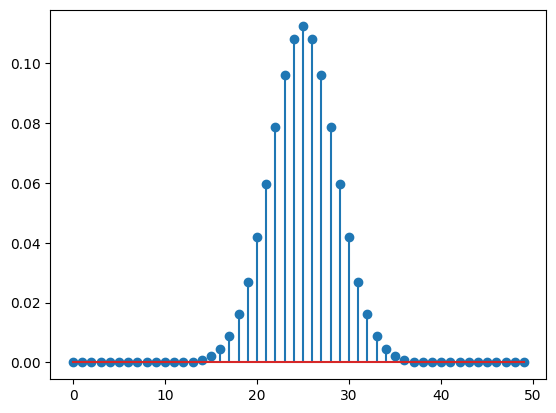

In [ ]:
n_experiment = 50
probability = 0.5
data = range(n_experiment)
pmf = binom.pmf(data,n_experiment,probability) #probabilidad masa de frecuencias
plt.figure()
plt.stem(data,pmf)
plt.show()

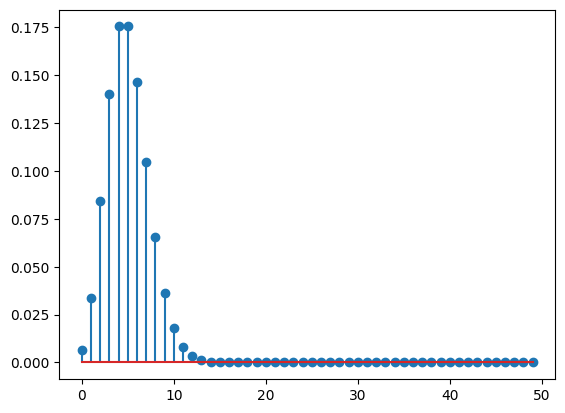

In [ ]:
#Poisson
n_experiments = 10
n_ocurr = 5
data = range(n_ocurr*n_experiments)
pmf = poisson.pmf(data,n_ocurr)
plt.figure()
plt.stem(data,pmf)
plt.show()

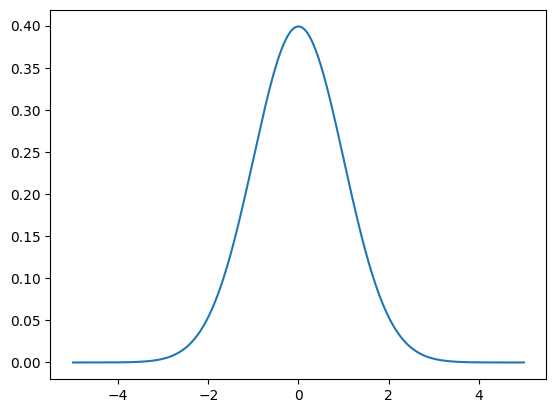

In [24]:
#Distribucion normal
u = 0
sigma = 1
data = np.linspace(-5,5,1000) #1000 puntos de -5 a 5
pdf = norm.pdf(data,u,sigma)
plt.plot(data,pdf)
plt.show()

In [27]:
u=df[df["sex"]=="Male"]["height"].mean()
sigma=(df[df["sex"]=="Male"]["height"].std(ddof=1))**2
sigma

np.float64(13.039491979007735)

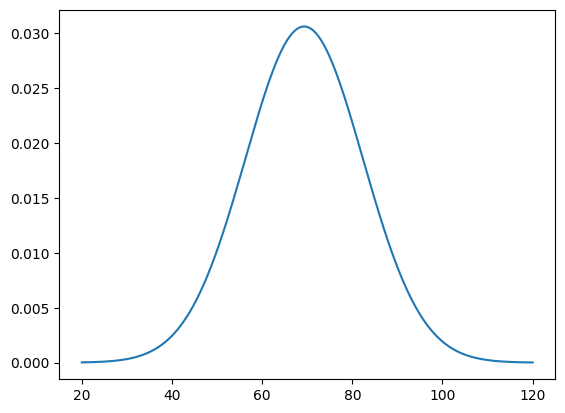

In [34]:
u=df[df["sex"]=="Male"]["height"].mean()
sigma=(df[df["sex"]=="Male"]["height"].std(ddof=1))**2
data = np.linspace(20,120,1000) #1000 puntos de 20 a 120
pdf = norm.pdf(data,u,sigma)
plt.plot(data,pdf)
plt.show()